# Neural network categorising the MNIST data set

In [37]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns


from functions import ReLU, ReLU_der, sigmoid, sigmoid_der, softmax, softmax_der, cross_entropy, cross_entropy_der, leaky_ReLU, leaky_ReLU_der
from nn_class_classification import NeuralNetwork

In [38]:
# Fetch the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')

X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Testing different numbers of layers and nodes

In [39]:
np.random.seed(42)

layer_no = [1,2]
layer_sizes = [50,100,200,300]

accuracies = np.zeros((2,4))

inputs = X_train
targets = y_train

for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        layer_output_sizes = [layer_sizes[j]] * layer_no[i] + [10]
        activation_funcs = [leaky_ReLU]*layer_no[i] + [softmax]
        activation_ders = [leaky_ReLU_der]*layer_no[i] + [None]

        NN = NeuralNetwork(
            X_train,
            targets,
            layer_output_sizes,
            activation_funcs,
            activation_ders,
            cross_entropy,
            None,
        )
        NN.train_network_stochastic_gd(lr_method="ADAM")

        test_scores = NN.predict(X_test)
        test_predict = np.argmax(test_scores, axis=1)
        
        accuracy = accuracy_score(y_test, test_predict)
        accuracies[i,j] = accuracy

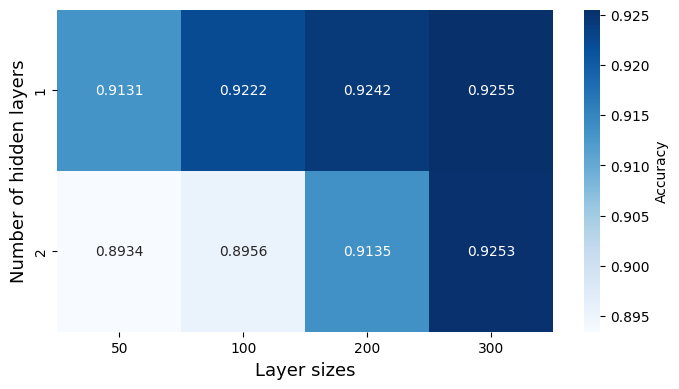

In [40]:
plt.figure(figsize=(7,4))
ax = sns.heatmap( accuracies, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True, cbar_kws={'label':'Accuracy'} )

ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)

plt.tight_layout()
plt.savefig("../Figures/MNIST_heatmap_accuracies_layers.png", dpi=300, bbox_inches="tight")
plt.show()

## Testing different lamdas

In [29]:
np.random.seed(42)

lambdas = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3]

accuracies_l1 = []
accuracies_l2 = []

inputs = X_train
targets = y_train

layer_output_sizes = [200, 10]
activation_funcs = [leaky_ReLU] + [softmax]
activation_ders = [leaky_ReLU_der] + [None]


for i in range(len(lambdas)):
    NN = NeuralNetwork(
        X_train,
        targets,
        layer_output_sizes,
        activation_funcs,
        activation_ders,
        cross_entropy,
        None,
        L2=True,
        lmbda=lambdas[i]
    )
    NN.train_network_stochastic_gd(lr_method="ADAM")

    test_scores = NN.predict(X_test)
    test_predict = np.argmax(test_scores, axis=1)
    
    accuracy = accuracy_score(y_test, test_predict)
    accuracies_l2.append(accuracy)

for i in range(len(lambdas)):
    NN = NeuralNetwork(
        X_train,
        targets,
        layer_output_sizes,
        activation_funcs,
        activation_ders,
        cross_entropy,
        None,
        L1=True,
        lmbda=lambdas[i]
    )
    NN.train_network_stochastic_gd(lr_method="ADAM")

    test_scores = NN.predict(X_test)
    test_predict = np.argmax(test_scores, axis=1)
    
    accuracy = accuracy_score(y_test, test_predict)
    accuracies_l1.append(accuracy)

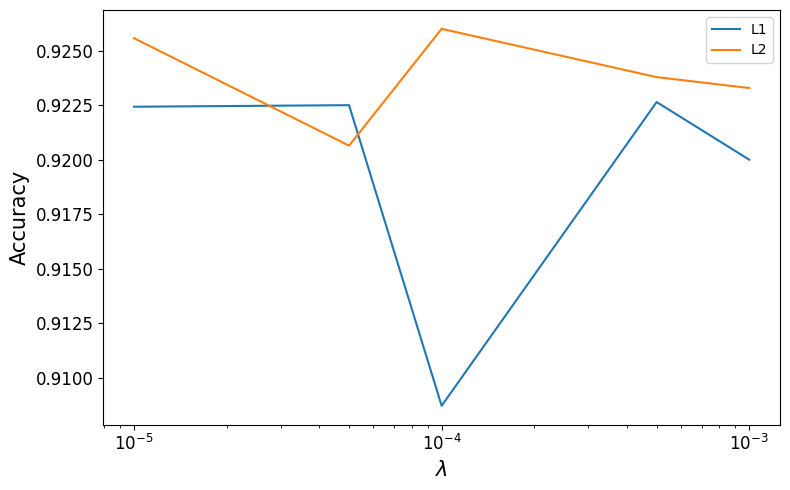

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(lambdas, accuracies_l1, label="L1")
ax.plot(lambdas, accuracies_l2, label="L2")

ax.set_xlabel("$\\lambda$", fontsize=15)
ax.set_ylabel("Accuracy", fontsize=15)
ax.set_xscale("log")


ax.tick_params(axis="both", labelsize=12)
ax.legend()
fig.tight_layout()
fig.savefig("../Figures/MNIST_lambdas.png", dpi=300, bbox_inches="tight")
plt.show()

NN with no L2

In [31]:
NN = NeuralNetwork(
    X_train,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    cross_entropy,
    None,
)
NN.train_network_stochastic_gd(lr_method="ADAM")

test_scores = NN.predict(X_test)
test_predict = np.argmax(test_scores, axis=1)

accuracy = accuracy_score(y_test, test_predict)
print(accuracy)

0.9162857142857143


In [32]:
print('L1', accuracies_l1)
print('L2', accuracies_l2)

L1 [0.9224285714285714, 0.9225, 0.9087142857142857, 0.9226428571428571, 0.92]
L2 [0.9255714285714286, 0.9206428571428571, 0.926, 0.9237857142857143, 0.9232857142857143]


## Testing different training methods
Using best perfoming network from above
One hidden layer with 100 nodes

In [7]:
# methods = ['Plain GD', 'Plain GD ADAM', 'Plain GD RMSProp', 'Stochastic GD','Stochastic GD ADAM', 'Stochastic GD RMSProp']
acc_methods = np.zeros((2,3))
lr_methods = [None, 'ADAM', 'RMSProp']
stoch_type = ['Plain GD', 'Stochastic GD']

In [13]:
np.random.seed(42)

# One layer, 50 neurons, sigmoid activation function, plain gradient descent, no optimizations
layer_output_sizes = [200, 10]
activation_funcs = [leaky_ReLU, softmax]
activation_ders = [leaky_ReLU_der, None]

inputs = X_train
targets = y_train


for i in range(len(lr_methods)):
    NN = NeuralNetwork(
        X_train,
        targets,
        layer_output_sizes,
        activation_funcs,
        activation_ders,
        cross_entropy,
        None,
        L2=True,
        lmbda=1e-4
    )

    NN.train_network_plain_gd(lr_method=lr_methods[i])

    test_scores = NN.predict(X_test)
    test_predict = np.argmax(test_scores, axis=1)

    accuracy = accuracy_score(y_test, test_predict)
    acc_methods[0,i] = accuracy


In [11]:
for i in range(len(lr_methods)):
    NN = NeuralNetwork(
        X_train,
        targets,
        layer_output_sizes,
        activation_funcs,
        activation_ders,
        cross_entropy,
        None,
        L2=True,
        lmbda=1e-4
    )

    NN.train_network_stochastic_gd(lr_method=lr_methods[i])

    test_scores = NN.predict(X_test)
    test_predict = np.argmax(test_scores, axis=1)

    accuracy = accuracy_score(y_test, test_predict)
    acc_methods[1,i] = accuracy

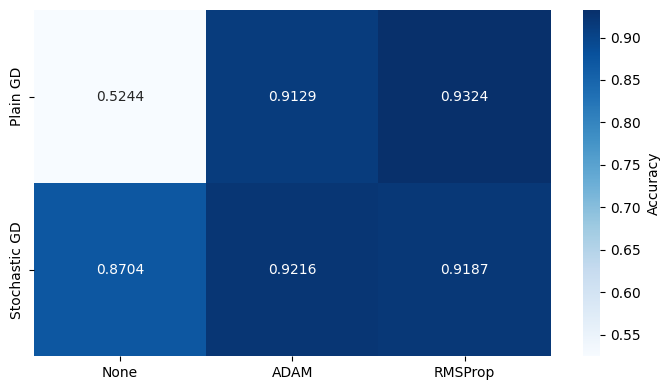

In [34]:
acc_methods.T
lr_methods = ['None', 'ADAM', 'RMSProp']
plt.figure(figsize=(7,4))
ax = sns.heatmap( acc_methods, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=lr_methods, yticklabels=stoch_type, cbar=True, cbar_kws={'label':'Accuracy'} )


plt.tight_layout()
plt.savefig("../Figures/MNIST_heatmap_accuracies_learning_method.png", dpi=300, bbox_inches="tight")
plt.show()

## Confusion matrix

In [30]:
np.random.seed(42)

# One layer, 50 neurons, sigmoid activation function, plain gradient descent, no optimizations
layer_output_sizes = [200, 10]
activation_funcs = [ReLU, softmax]
activation_ders = [ReLU_der, None]

inputs = X_train
targets = y_train

NN = NeuralNetwork(
    X_train,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    cross_entropy,
    None,
    L2=True,
    lmbda=1e-4
)

# NN.train_network_stochastic_gd(lr_method='ADAM')
NN.train_network_plain_gd(lr_method='RMSProp')

test_scores = NN.predict(X_test)
test_predict = np.argmax(test_scores, axis=1)

accuracy = accuracy_score(y_test, test_predict)


In [26]:
print('stoch gd ADAM+sigmoid', accuracy)

stoch gd ADAM+sigmoid 0.9243571428571429


In [28]:
print('stoch gd ADAM+RELU', accuracy)

stoch gd ADAM+RELU 0.9250714285714285


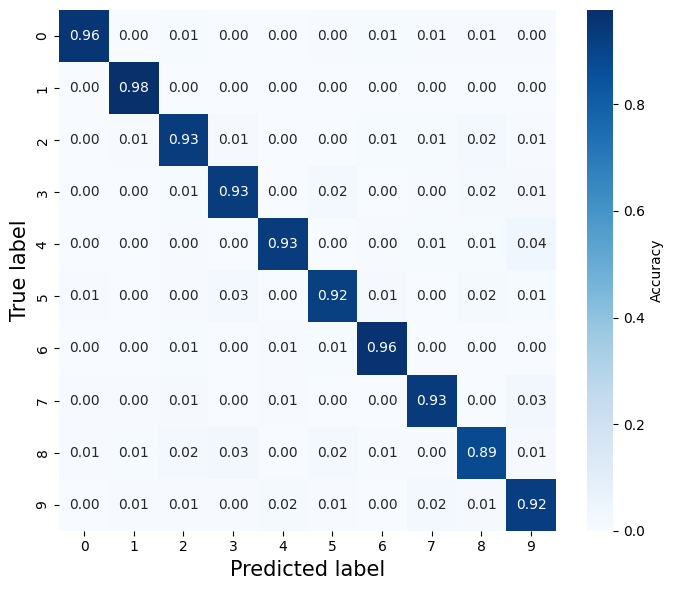

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
test_scores = NN.predict(X_test)
y_pred = np.argmax(test_scores, axis=1)

# Confusion matrix from scikit-learn
cm = confusion_matrix(y_test, y_pred)


cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)], cbar_kws={'label':'Accuracy'})
plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)
plt.tight_layout()
plt.savefig('../Figures/confusion_matrix_200_plain_gd_RMSProp.png', dpi=300, bbox_inches='tight')
plt.show()